<a href="https://colab.research.google.com/github/takumaosada/COVID-19-Basic-Analysis/blob/master/signate_covid19_case_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データの読み込み

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install japanize_matplotlib
!pip install category_encoders
import japanize_matplotlib
import category_encoders as ce
import gspread
from oauth2client.client import GoogleCredentials
from google.colab import auth
auth.authenticate_user()

In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
singatecasefilelink='https://docs.google.com/spreadsheets/d/1VLSA8q2zPCbaTDXXcMsxK0HRZlFRVH7_x0rLd4Z7Jk8/edit#gid=960903158'
book = gc.open_by_url(singatecasefilelink)
casedata = book.worksheet('罹患者').get_all_values()
casedf = pd.DataFrame(casedata)

In [4]:
#データフレームを整理していく
area_dict = dict(zip(casedf.index, casedf.iloc[0]))
renamed_df = casedf.rename(columns=area_dict)
df = renamed_df.drop(0)
df =df.drop_duplicates()
df.drop(df.index[-1]).tail()

,都道府県コード,症例番号,都道府県症例番号,発症日,確定日,公表日,受診都道府県,居住都道府県,居住市区町村,年代,性別,職業,ステータス,退院済ﾌﾗｸﾞ,基礎疾患ﾌﾗｸﾞ,症状・経過,症状一覧,行動歴,濃厚接触者状況,濃厚接触場所,海外渡航歴ﾌﾗｸﾞ,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,情報源,備考,罹患者関係_記入済ﾌﾗｸﾞ,罹患者トランザクション_記入済ﾌﾗｸﾞ,Relation1,Relation2,Transaction
16156,50,1,50-1,,,,中部国際空港,,,,,,,,,,,,,,,,,,0,0,,,
16157,51,27,51-27,,2020/03/27,,関西国際空港,不明,,20 - 29,男性,,無症状,0,,,,,,,,,https://www.mhlw.go.jp/stf/newpage_10539.html,,0,0,,,
16158,51,28,51-28,,2020/03/27,,関西国際空港,兵庫県,,非公表,男性,,無症状,0,,,,,,,,,https://www.mhlw.go.jp/stf/newpage_10539.html,,0,0,,,
16159,51,52,51-52,,2020/03/30,,関西国際空港,不明,,30 - 39,男性,,無症状,0,,,,,,,,,https://www.mhlw.go.jp/stf/newpage_10638.html,3/29ドイツから帰国,0,0,,,
16160,51,53,51-53,,2020/03/30,,関西国際空港,不明,,40 - 49,男性,,無症状,0,,,,,,,,,https://www.mhlw.go.jp/stf/newpage_10638.html,3/29オランダから帰国,0,0,,,


# データの確認

In [5]:
df.describe()

,都道府県コード,症例番号,都道府県症例番号,発症日,確定日,公表日,受診都道府県,居住都道府県,居住市区町村,年代,性別,職業,ステータス,退院済ﾌﾗｸﾞ,基礎疾患ﾌﾗｸﾞ,症状・経過,症状一覧,行動歴,濃厚接触者状況,濃厚接触場所,海外渡航歴ﾌﾗｸﾞ,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,情報源,備考,罹患者関係_記入済ﾌﾗｸﾞ,罹患者トランザクション_記入済ﾌﾗｸﾞ,Relation1,Relation2,Transaction
count,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161,16161
unique,51,5175,16158,218,176,178,51,73,791,12,6,121,8,6,6,5995,1812,2907,3984,226,9,4,3232,1336,2,2,1792,3141,229
top,13,1,12-621,非公表,,2020/04/11,東京都,東京都,,50 - 59,男性,,,,,,,,,,,,,,0,0,,,
freq,5162,47,2,5205,4784,674,5162,3836,4638,2636,8682,6541,9412,8836,11928,8179,10814,9974,8403,12728,10125,10885,4091,12960,11874,15934,12368,12369,13890


In [6]:
# nullの値があるかどうか確認
df.isnull().sum()

都道府県コード                  0
症例番号                     0
都道府県症例番号                 0
発症日                      0
確定日                      0
公表日                      0
受診都道府県                   0
居住都道府県                   0
居住市区町村                   0
年代                       0
性別                       0
職業                       0
ステータス                    0
退院済ﾌﾗｸﾞ                  0
基礎疾患ﾌﾗｸﾞ                 0
症状・経過                    0
症状一覧                     0
行動歴                      0
濃厚接触者状況                  0
濃厚接触場所                   0
海外渡航歴ﾌﾗｸﾞ                0
ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ    0
情報源                      0
備考                       0
罹患者関係_記入済ﾌﾗｸﾞ            0
罹患者トランザクション_記入済ﾌﾗｸﾞ      0
Relation1                0
Relation2                0
Transaction              0
dtype: int64

In [7]:
# naの値があるかどうか確認
df.isna().sum()

都道府県コード                  0
症例番号                     0
都道府県症例番号                 0
発症日                      0
確定日                      0
公表日                      0
受診都道府県                   0
居住都道府県                   0
居住市区町村                   0
年代                       0
性別                       0
職業                       0
ステータス                    0
退院済ﾌﾗｸﾞ                  0
基礎疾患ﾌﾗｸﾞ                 0
症状・経過                    0
症状一覧                     0
行動歴                      0
濃厚接触者状況                  0
濃厚接触場所                   0
海外渡航歴ﾌﾗｸﾞ                0
ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ    0
情報源                      0
備考                       0
罹患者関係_記入済ﾌﾗｸﾞ            0
罹患者トランザクション_記入済ﾌﾗｸﾞ      0
Relation1                0
Relation2                0
Transaction              0
dtype: int64

# データクリーニング


In [0]:
#性別でのデータクリーニングを行う
df = df[(df['性別'] == "男性") | (df['性別'] == '女性')]
#年代でのデータクリーニングを行う
df = df[(df['年代'] != "51 - 59") & (df['年代'] != '非公表') & (df['年代'] != '')]
#海外渡航歴でのデータクリーニングを行う
df["海外渡航歴ﾌﾗｸﾞ"] = df["海外渡航歴ﾌﾗｸﾞ"].str.replace("非公表", "").str.replace("１", "1").str.replace("０", "0").str.replace("他自治体で調査中", "").str.replace("千葉県で調査中", "").str.replace("不明", "")
#ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞでのデータクリーニングを行う
df["ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ"] = df["ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ"].str.replace("非公表", "").str.replace("１", "1")

In [9]:
for column_name, item in df.iteritems():
    print(column_name, type(column_name))
    print(df[column_name].value_counts())
    print('========================\n')

都道府県コード <class 'str'>
13    5143
27    1778
14    1282
11     998
1      982
12     753
28     698
40     665
23     508
26     351
17     293
16     212
8      168
21     151
10     149
34     147
47     142
18     122
4       88
25      82
15      82
7       81
38      79
29      74
39      74
6       66
9       55
30      54
20      53
22      49
44      49
19      48
43      47
41      45
24      45
37      28
2       27
32      24
35      21
49      19
42      17
45      16
5       16
33      14
48       8
46       6
36       5
51       3
31       3
Name: 都道府県コード, dtype: int64

症例番号 <class 'str'>
1       46
2       45
6       44
3       44
4       44
        ..
4776     1
2571     1
1794     1
2028     1
3679     1
Name: 症例番号, Length: 5159, dtype: int64

都道府県症例番号 <class 'str'>
21-150     2
12-621     2
44-40      2
13-4993    1
24-23      1
          ..
20-22      1
13-2044    1
1-746      1
13-3824    1
13-3885    1
Name: 都道府県症例番号, Length: 15817, dtype: int64

発症日 <class 'str'>
非

In [0]:
#性別をencodeする
import category_encoders as ce
df_gender = df['性別']
list_cols = ['性別']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['性別'] = ce_ohe.fit_transform(df_gender)

In [0]:
#受診都道府県をencodeする
df_city = df['受診都道府県']
list_cols = ['受診都道府県']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['受診都道府県'] = ce_ohe.fit_transform(df_city)

In [0]:
#居住都道府県をencodeする
df_city = df['居住都道府県']
list_cols = ['居住都道府県']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['居住都道府県'] = ce_ohe.fit_transform(df_city)

In [0]:
#年代をencodeする
df_age = df['年代']
list_cols = ['年代']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['年代'] = ce_ohe.fit_transform(df_age)

In [0]:
#ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞをencodeする
df_diamond = df['ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ']
list_cols = ['ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ'] = ce_ohe.fit_transform(df_diamond)

In [0]:
df_foreign = df['海外渡航歴ﾌﾗｸﾞ']
#海外渡航歴ﾌﾗｸﾞをencodeする
list_cols = ['海外渡航歴ﾌﾗｸﾞ']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['海外渡航歴ﾌﾗｸﾞ'] = ce_ohe.fit_transform(df_foreign)

# PairPlotで相関を確認する

In [0]:
# sns.pairplot(df)

In [0]:
#職業とステータスの関係性
job_status_df = df[['職業', 'ステータス']]
job_status_df = job_status_df.groupby('職業').filter(lambda x: len(x) > 100)

df_status = job_status_df['ステータス']
list_cols = ['ステータス']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
job_status_df['ステータス'] = ce_ohe.fit_transform(df_status)

job_status_df['ステータス'] = job_status_df['ステータス'].astype(float)

In [0]:
# fig, axs = plt.subplots(15, 1, figsize=(10, 10))
# for count, (index, value) in enumerate(job_status_df['職業'].value_counts().iteritems(), 1):
#   title = str(index) + ' (標本数: ' + str(value) +  ")"
#   dataframe = job_status_df[job_status_df['職業'] == index]
#   axs[count].set_title(title)
#   axs[count].pie(dataframe["ステータス"])

# plt.show()

# Xgboostを用いた分析

## データの整理

In [0]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import clear_output

In [0]:
df_new = df[["都道府県コード", "年代", "性別", "ステータス", "海外渡航歴ﾌﾗｸﾞ", "症状一覧"]]

In [0]:
# ステータスは`非公開`や``をdropし、中等症以上のものは1, 中等症未満は２に変換する
df_new = df_new[(df['ステータス'] == "重症") | (df['ステータス'] == '軽症') | (df['ステータス'] == '死亡') | (df['ステータス'] == '無症状') | (df['ステータス'] == '中等症')]
df_new["ステータス"] = df_new["ステータス"].str.replace("重症", "1").str.replace("死亡", "1").str.replace("中等症", "1").str.replace("軽症", "2").str.replace("無症状", "2")
df_new["ステータス"]  =df_new["ステータス"].astype(int)

In [0]:
# 症状一覧で`非公開`や``をdropし、発熱・咳・頭痛・倦怠感があるかどうかのフラグを作成する
df_new = df_new[(df['症状一覧'] != "") & (df['症状一覧'] != '非公表') & (df['症状一覧'] != ' ')]
df_new["発熱フラグ"] = df_new["症状一覧"].str.contains("発熱")
df_new["咳フラグ"] = df_new["症状一覧"].str.contains("咳")
df_new["頭痛フラグ"] = df_new["症状一覧"].str.contains("頭痛")
df_new["倦怠感フラグ"] = df_new["症状一覧"].str.contains("倦怠感")

In [0]:
df_new["都道府県コード"] = df_new["都道府県コード"].astype(int)

In [60]:
df_new.dtypes

都道府県コード       int64
年代            int64
性別            int64
ステータス         int64
海外渡航歴ﾌﾗｸﾞ     int64
症状一覧         object
発熱フラグ          bool
咳フラグ           bool
頭痛フラグ          bool
倦怠感フラグ         bool
dtype: object

In [0]:
# 症状一覧をdropする
df_new = df_new.drop('症状一覧', axis=1)

## 全体の場合

In [0]:
df_train, df_test = train_test_split(df_new, test_size=0.3, random_state=0)

y_train = df_train['ステータス']
y_test = df_test['ステータス']
x_train = df_train.drop(['ステータス'], axis=1)
x_test = df_test.drop(['ステータス'], axis=1)

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [66]:
df_train['ステータス'].value_counts()

2    1485
1     233
Name: ステータス, dtype: int64

In [0]:
params = {
    'n_estimators': 5000,
    'max_depth': 7,
    'objective':'reg:linear',
    'min_child_weight': 4,
    'eta': 0.07,
    'eval_metric': 'mae',
}
evals = [(dtrain, 'train'), (dtest, 'test')]

evals_result = {}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,
    evals=evals,
    early_stopping_rounds=30,
    evals_result=evals_result,
        )
clear_output()

In [68]:
def mean_error_rate(y_pred, y_test):
    mer = np.mean(abs(y_pred-y_true)/y_true * 100)
    return mer

y_pred = model.predict(dtest)
y_true = y_test.values

print('誤差率 : {0:.4f} %'.format(mean_error_rate(y_pred, y_test)))

誤差率 : 16.0120 %


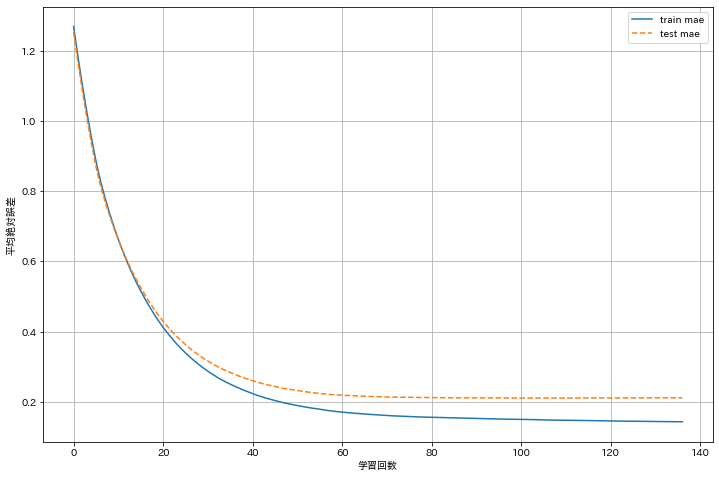

In [69]:
plt.figure(figsize=(12, 8))
train_metric = evals_result['train']['mae']
plt.plot(train_metric, label='train mae')
eval_metric = evals_result['test']['mae']
plt.plot(eval_metric, label='test mae', linestyle='dashed')
plt.grid()
plt.legend()
plt.xlabel('学習回数')
plt.ylabel('平均絶対誤差')
plt.savefig('kodate_learning_curve.png')
plt.show()

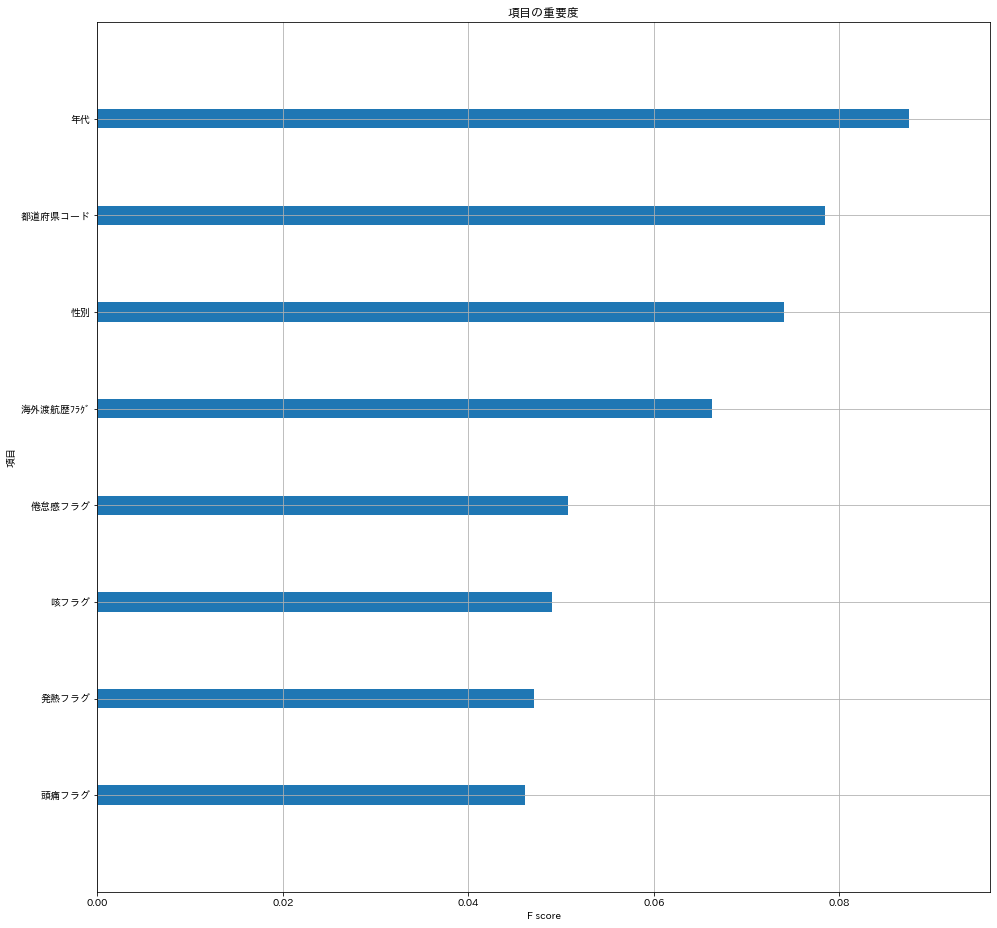

In [70]:
_, ax = plt.subplots(figsize=(16, 16))
xgb.plot_importance(model, ax=ax,  importance_type='gain', title='項目の重要度',show_values=False)
plt.ylabel("項目")
plt.savefig('kodate_feature.png')
plt.show()

## 東京のみの場合

In [0]:
df_new_tokyo = df_new[df_new["都道府県コード"] == 13]

In [0]:
df_train, df_test = train_test_split(df_new_tokyo, test_size=0.3, random_state=0)

y_train = df_train['ステータス']
y_test = df_test['ステータス']
x_train = df_train.drop(['ステータス'], axis=1)
x_test = df_test.drop(['ステータス'], axis=1)

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [77]:
df_train['ステータス'].value_counts()

2    135
1      8
Name: ステータス, dtype: int64

In [0]:
params = {
    'n_estimators': 5000,
    'max_depth': 7,
    'objective':'reg:linear',
    'min_child_weight': 4,
    'eta': 0.07,
    'eval_metric': 'mae',
}
evals = [(dtrain, 'train'), (dtest, 'test')]

evals_result = {}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,
    evals=evals,
    early_stopping_rounds=30,
    evals_result=evals_result,
        )
clear_output()

In [79]:
y_pred = model.predict(dtest)
y_true = y_test.values

print('誤差率 : {0:.4f} %'.format(mean_error_rate(y_pred, y_test)))

誤差率 : 10.1119 %


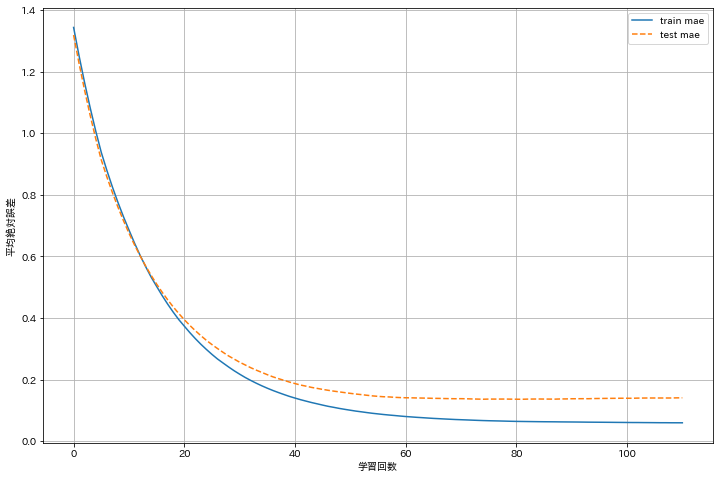

In [80]:
plt.figure(figsize=(12, 8))
train_metric = evals_result['train']['mae']
plt.plot(train_metric, label='train mae')
eval_metric = evals_result['test']['mae']
plt.plot(eval_metric, label='test mae', linestyle='dashed')
plt.grid()
plt.legend()
plt.xlabel('学習回数')
plt.ylabel('平均絶対誤差')
plt.savefig('kodate_learning_curve.png')
plt.show()

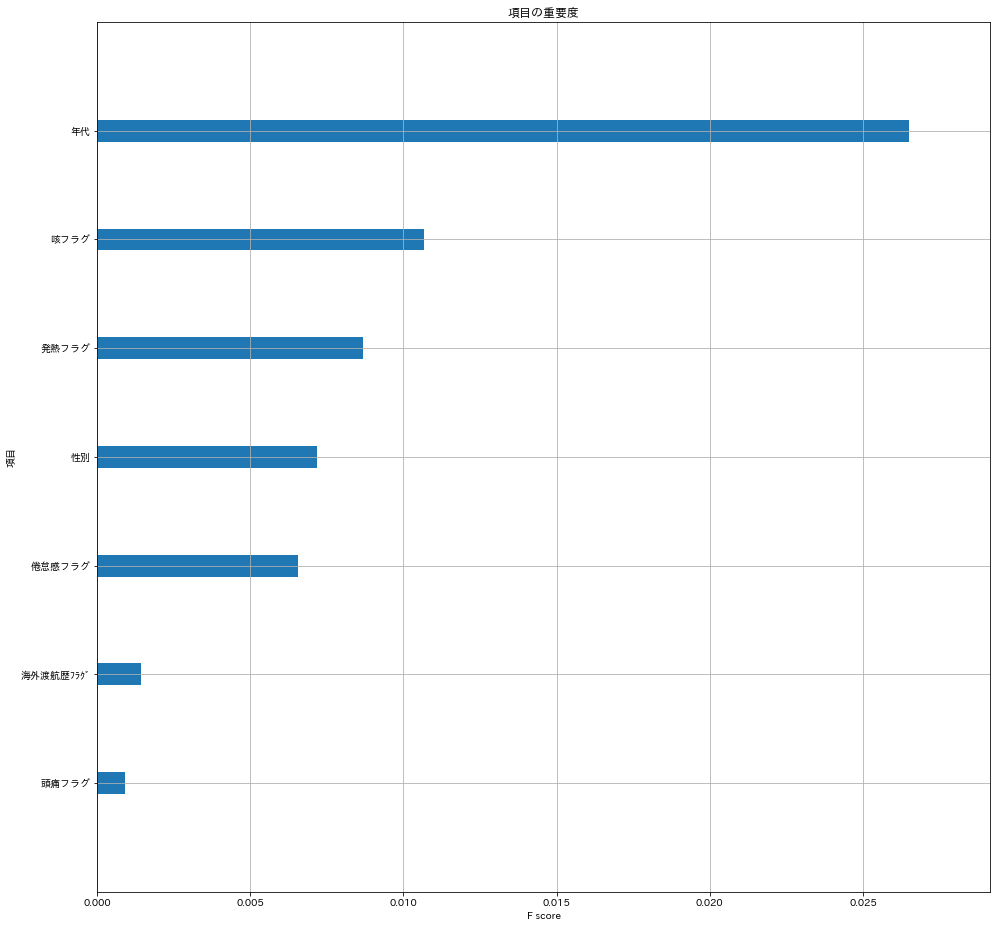

In [81]:
_, ax = plt.subplots(figsize=(16, 16))
xgb.plot_importance(model, ax=ax,  importance_type='gain', title='項目の重要度',show_values=False)
plt.ylabel("項目")
plt.savefig('kodate_feature.png')
plt.show()

## 神奈川のみの場合

In [0]:
df_new_kanagawa = df_new[df_new["都道府県コード"] == 14]

In [0]:
df_train, df_test = train_test_split(df_new_kanagawa, test_size=0.3, random_state=0)

y_train = df_train['ステータス']
y_test = df_test['ステータス']
x_train = df_train.drop(['ステータス'], axis=1)
x_test = df_test.drop(['ステータス'], axis=1)

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [84]:
df_train['ステータス'].value_counts()

2    241
1     61
Name: ステータス, dtype: int64

In [0]:
params = {
    'n_estimators': 5000,
    'max_depth': 7,
    'objective':'reg:linear',
    'min_child_weight': 4,
    'eta': 0.07,
    'eval_metric': 'mae',
}
evals = [(dtrain, 'train'), (dtest, 'test')]

evals_result = {}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,
    evals=evals,
    early_stopping_rounds=30,
    evals_result=evals_result,
        )
clear_output()

In [86]:
y_pred = model.predict(dtest)
y_true = y_test.values

print('誤差率 : {0:.4f} %'.format(mean_error_rate(y_pred, y_test)))

誤差率 : 24.0190 %


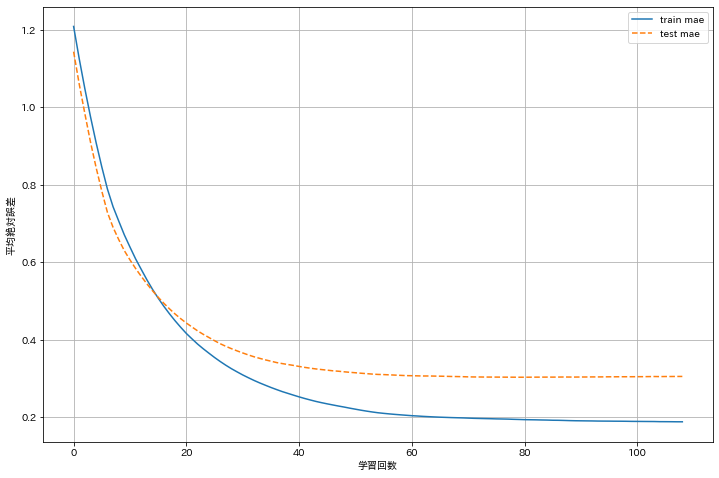

In [87]:
plt.figure(figsize=(12, 8))
train_metric = evals_result['train']['mae']
plt.plot(train_metric, label='train mae')
eval_metric = evals_result['test']['mae']
plt.plot(eval_metric, label='test mae', linestyle='dashed')
plt.grid()
plt.legend()
plt.xlabel('学習回数')
plt.ylabel('平均絶対誤差')
plt.savefig('kodate_learning_curve.png')
plt.show()

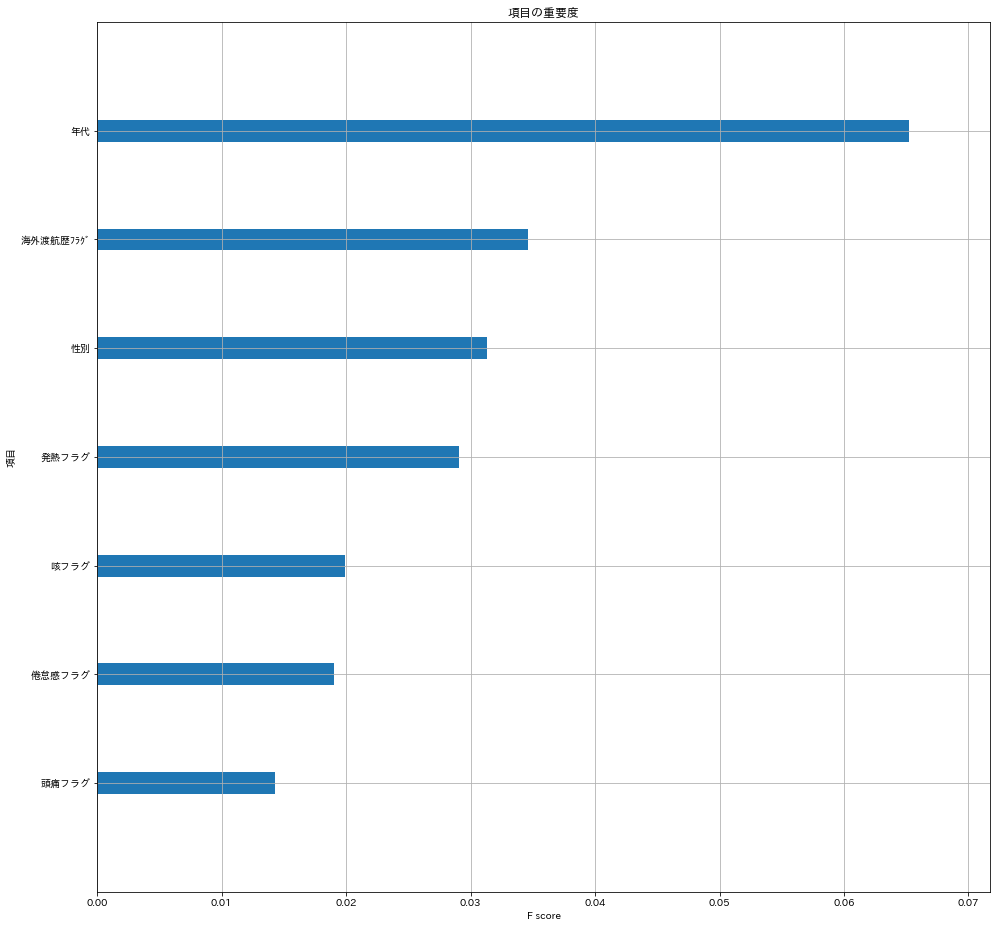

In [88]:
_, ax = plt.subplots(figsize=(16, 16))
xgb.plot_importance(model, ax=ax,  importance_type='gain', title='項目の重要度',show_values=False)
plt.ylabel("項目")
plt.savefig('kodate_feature.png')
plt.show()

## 北海道のみの場合

In [0]:
df_new_hokkaido = df_new[df_new["都道府県コード"] == 1]

In [0]:
df_train, df_test = train_test_split(df_new_hokkaido, test_size=0.3, random_state=0)

y_train = df_train['ステータス']
y_test = df_test['ステータス']
x_train = df_train.drop(['ステータス'], axis=1)
x_test = df_test.drop(['ステータス'], axis=1)

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [92]:
df_train['ステータス'].value_counts()

2    349
1     49
Name: ステータス, dtype: int64

In [0]:
params = {
    'n_estimators': 5000,
    'max_depth': 7,
    'objective':'reg:linear',
    'min_child_weight': 4,
    'eta': 0.07,
    'eval_metric': 'mae',
}
evals = [(dtrain, 'train'), (dtest, 'test')]

evals_result = {}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,
    evals=evals,
    early_stopping_rounds=30,
    evals_result=evals_result,
        )
clear_output()

In [94]:
y_pred = model.predict(dtest)
y_true = y_test.values

print('誤差率 : {0:.4f} %'.format(mean_error_rate(y_pred, y_test)))

誤差率 : 16.2155 %


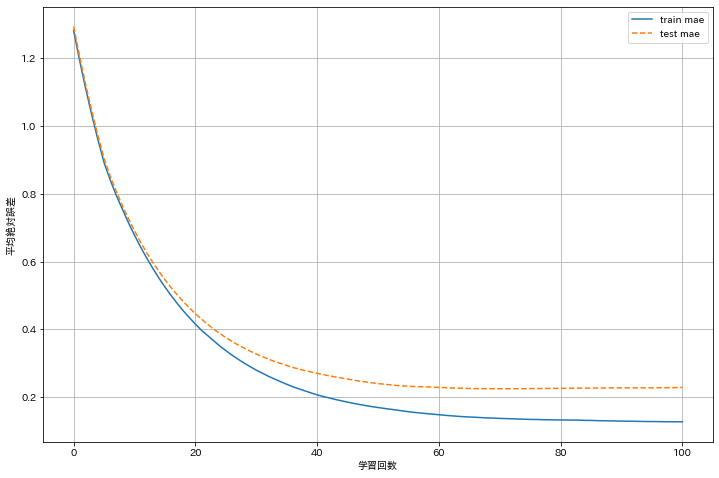

In [95]:
plt.figure(figsize=(12, 8))
train_metric = evals_result['train']['mae']
plt.plot(train_metric, label='train mae')
eval_metric = evals_result['test']['mae']
plt.plot(eval_metric, label='test mae', linestyle='dashed')
plt.grid()
plt.legend()
plt.xlabel('学習回数')
plt.ylabel('平均絶対誤差')
plt.savefig('kodate_learning_curve.png')
plt.show()

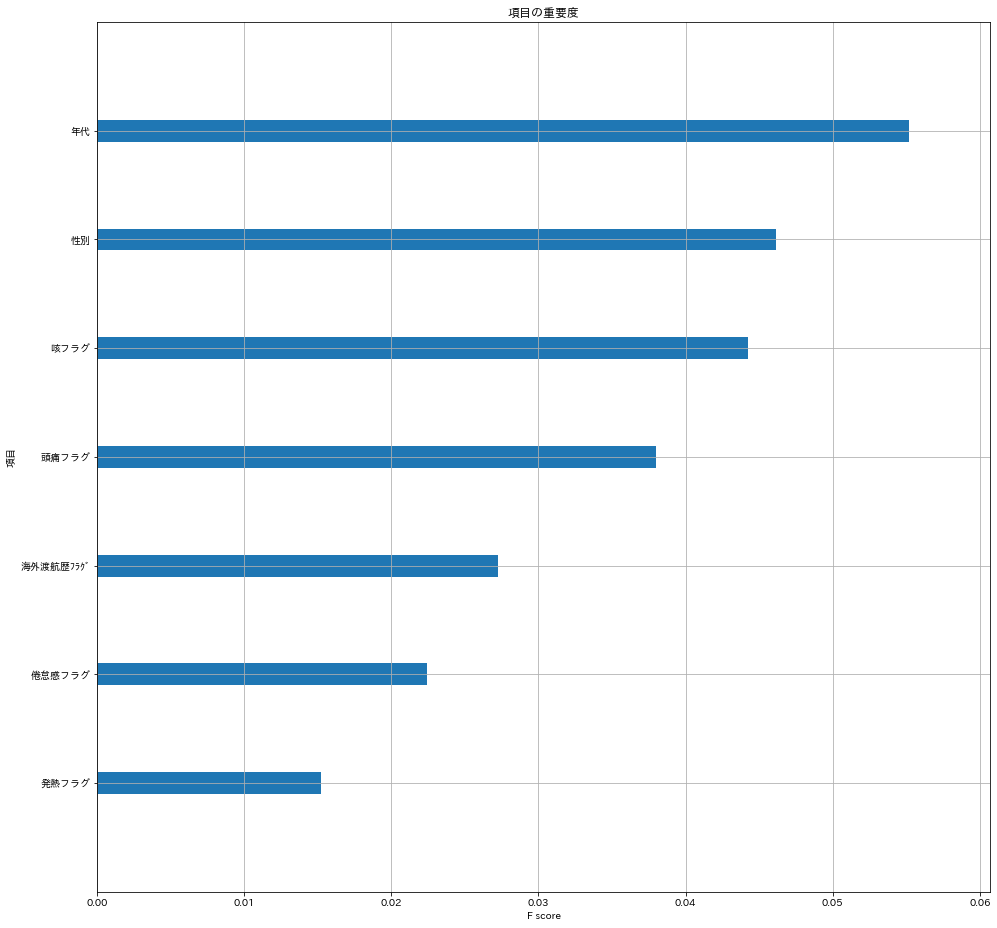

In [96]:
_, ax = plt.subplots(figsize=(16, 16))
xgb.plot_importance(model, ax=ax,  importance_type='gain', title='項目の重要度',show_values=False)
plt.ylabel("項目")
plt.savefig('kodate_feature.png')
plt.show()